<a href="https://colab.research.google.com/github/simplifique-treinamentos/notebooks-python/blob/main/WebScrapingBeautifulSoupTempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autor: Fernando Timoteo Fernandes <br />
Data: 13/06/2022 <br />

Sejam bem-vindos!


Uma boa parte do trabalho de um cientista de dados consiste na tarefa de coletar dados de diferentes fontes, transformar e integrar dados de diferentes fontes. 

O *Web scraping* pode ser uma alternativa para coleta de dados públicos disponíveis na internet e o Python possui bibliotecas que facilitam esta tarefa. 

<b>A biblioteca Beautiful Soup do python permite realizar *Web Scraping* para extrair dados de páginas HTML e documentos XML.</b>

Acompanhem a seguir!
<hr>

# Exemplo de Web Scraping (Previsão do Tempo)
"*Raspagem de Dados*" de Previsão do Tempo <br/><br />

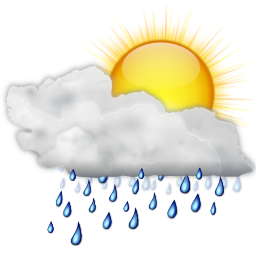

**Objetivos:** Coletar dados na web usando a biblioteca BeautifulSoup para a "raspagem" de dados


**Roteiro:**

Ao término deste roteiro, você irá conseguir responder às seguintes perguntas:

*   **Como consultar uma página html de forma programática**
  * Como realizar uma requisição http usando o método get
  * Como filtrar por tags específicas
  * Como juntar tudo em um dataframe

* **Bibliotecas utilizadas**

  * **Pandas** - Biblioteca em python que permite análise e manipulação de dados (https://pandas.pydata.org/)

  * **Beautiful Soup** - Biblioteca para "puxar" dados de páginas HTML e de arquivos XML (https://pypi.org/project/beautifulsoup4/ , 
https://beautiful-soup-4.readthedocs.io/en/latest/)
  * **requests** - biblioteca que permite enviar solicitações HTTP de maneira extremamente fácil. (https://pypi.org/project/requests/)

<br />

* **Fonte de dados:** INPE (https://tempo.cptec.inpe.br/sp/sao-paulo )


#1) Carregar as bibliotecas necessárias

In [53]:
#biblioteca útil para 
import pandas as pd

#módulo para acessar páginas via método http get
from requests import get 

#Biblioteca para analisar dados de páginas HTML/XML
from bs4 import BeautifulSoup

#2) Acessar página HTML

Quando um navegador carrega uma página, é criado um modelo de documento (DOM) com uma estrutura hierárquica em que podemos navegar por seus elementos (tags) para extrair informações.

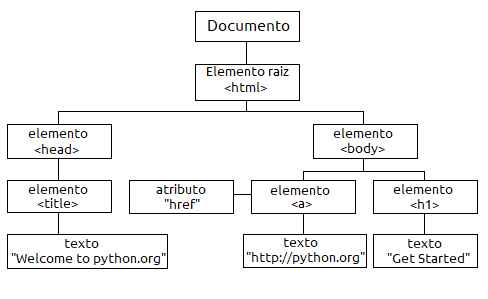

Fonte: Elaborado pelo autor. Baseado em w3schools.com

**É possível visualizar esta estrutura ao inspecionar a página**

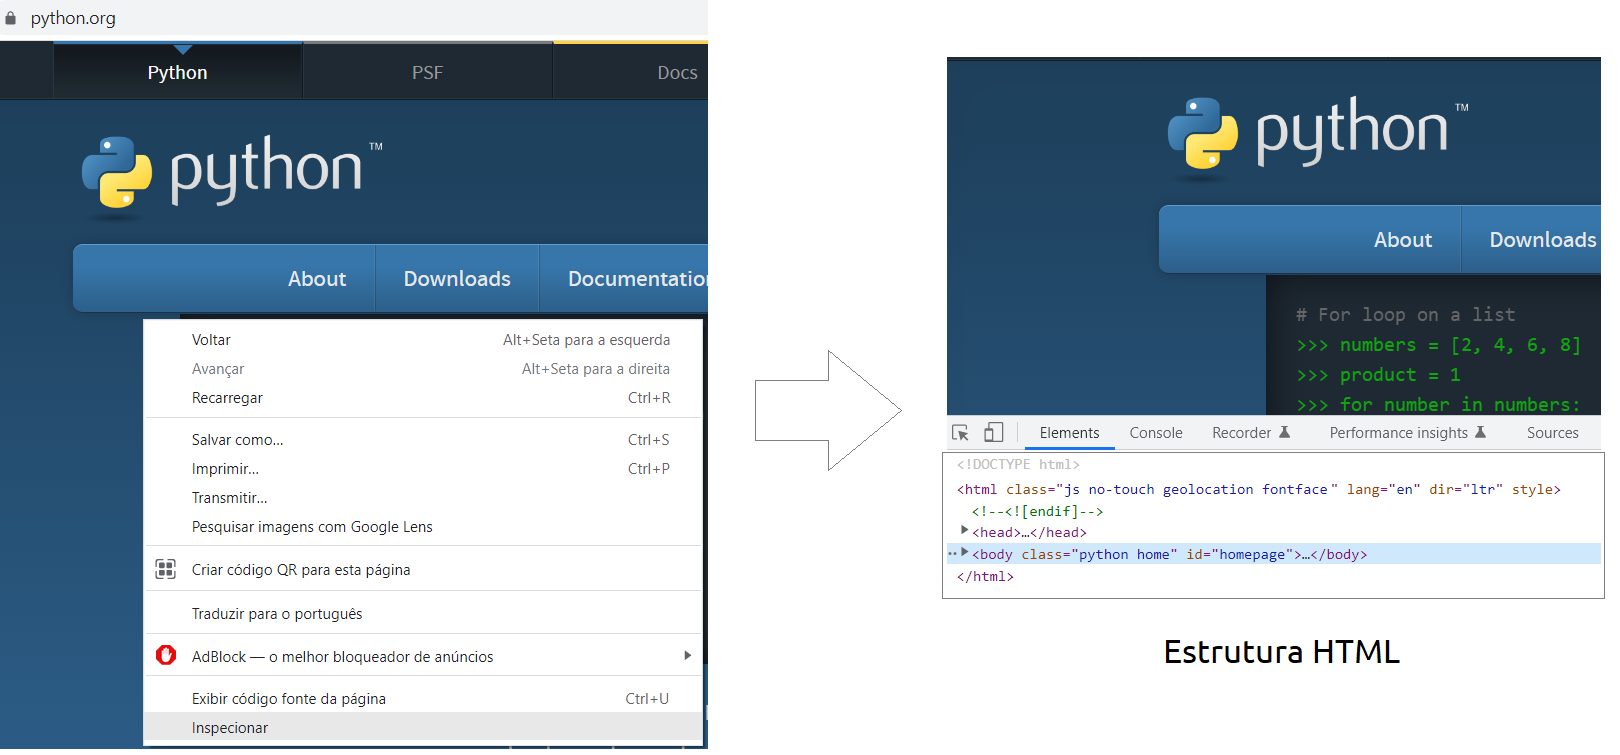

Fonte: Elaborado pelo autor

**É possível navegar por toda a estrutura para acessar valores em elementos (tags) HTML específicos !** 

## 2.1) Acessar a página e definir objeto
Defino objeto (soup) para navegar na página html <br /><br />
Como exemplo, utilizaremos os dados de previsão do tempo fornecidos pelo INPE e filtrando para São Paulo.

In [56]:
#Faço a requisição GET para a url
url = 'https://tempo.cptec.inpe.br/sp/sao-paulo'

#utilizo o método get da biblioteca requests para fazer a requisição HTTP
response = get(url)

# Crio o objeto soup e verifico o status da resposta
soup = BeautifulSoup(response.text, 'html.parser')

#Esperamos que ao realizar a requisição HTTP, tenhamos o retorno com código 200 (sucesso), 
#significando que a requisição foi feita com sucesso
if(response.status_code==200):
  print("Página consultada com sucesso! Pode prosseguir!")
else:
  print("Falha na consulta! Teste acessando a URL em outra aba!")

Página consultada com sucesso! Pode prosseguir!


## 2.2) Exibo o conteúdo da página HTML

In [79]:
from IPython import display

#Desmarque o código abaixo para visualizar todo o conteúdo HTML
#print(soup.prettify())

#Ajuste o tamanho da célula a seguir para facilitar a visualização
#display.Javascript("google.colab.output.setIframeHeight('300px');")

**Print da imagem**

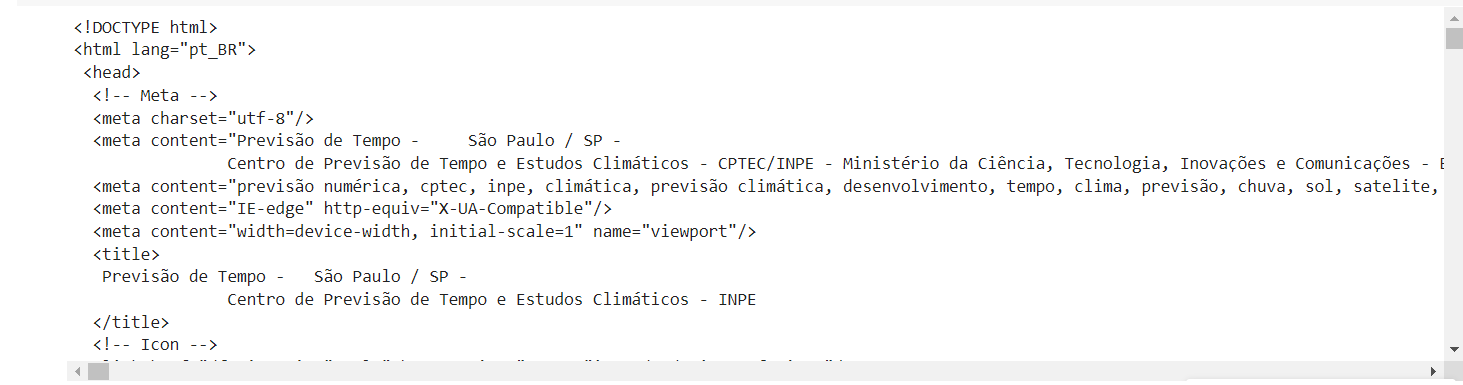

### 2.2.1) Verifico informações básicas da página
Título, parágrafos, etc.

In [59]:
soup.title

<title>Previsão de Tempo - 	 São Paulo / SP -
		Centro de Previsão de Tempo e Estudos Climáticos - INPE</title>

In [60]:
#título da página
soup.title.string

'Previsão de Tempo - \t São Paulo / SP -\n\t\tCentro de Previsão de Tempo e Estudos Climáticos - INPE'

## 2.3) Filtrar por tags específicas (find_all)

Ao inspecionar a página do INPE, é possível ver que as tags que contém os dados de temperatura estão usando a classe CSS "proximos-dias" <br />

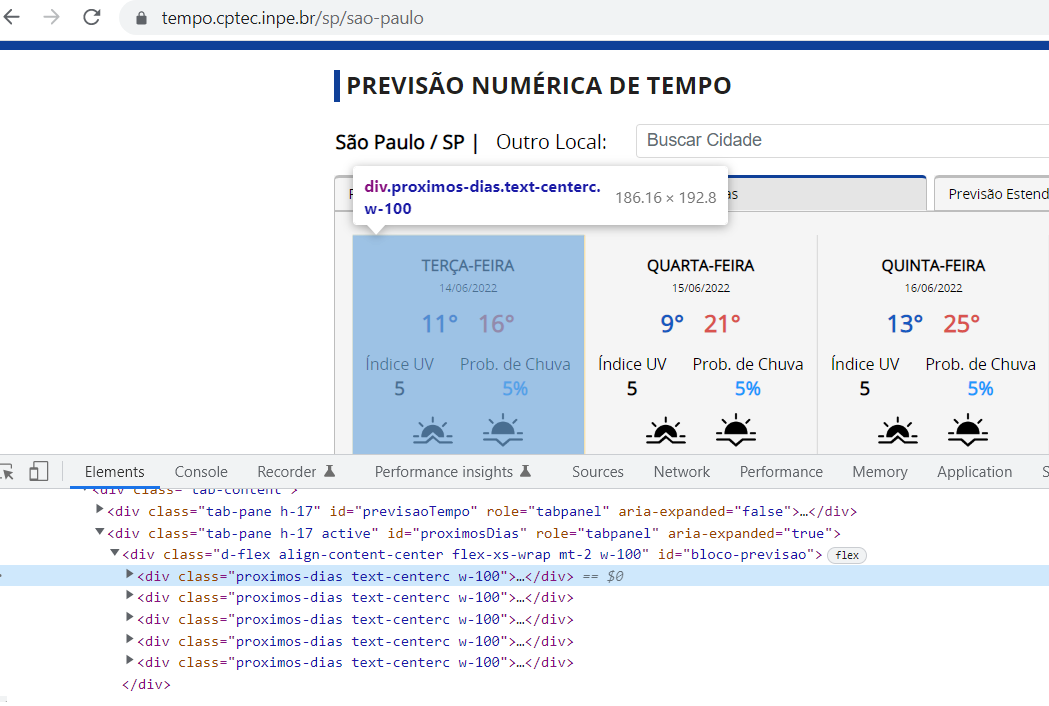

Portanto, filtro por estas tags específicas usando o método **find_all** do Beautiful Soup

In [62]:
#Filtro por todos os links com a classe com dados das temperaturas
print(soup.find_all("div", class_="proximos-dias"))
display.Javascript("google.colab.output.setIframeHeight('300px');")

[<div class="proximos-dias text-centerc w-100">
<div class="d-flex justify-content-center mt-2">
<div class="text-center align-items-center mt-2">
<span class="font-weight-bold"><span class="font-weight-bold text-uppercase">Quarta-Feira</span><br/></span>
<small>15/06/2022</small>
</div>
</div>
<div class="d-flex justify-content-center">
<div class="p-2 order-first">
<div class="d-flex justify-content-center">
<span alt="Temperatura Mínima" class="font-weight-bold temp-min font-dados" data-placement="top" data-toggle="tooltip" title="Temperatura Mínima">9°</span>
</div>
</div>
<div class="p-2 order-last ">
<div class="justify-content-center">
<span alt="Temperatura Máxima" class="font-weight-bold temp-max font-dados" data-placement="top" data-toggle="tooltip" title="Temperatura Máxima">21°</span>
</div>
</div>
</div>
<div class="d-flex justify-content-around mt-1">
<div class="order-first text-center">Índice UV
                        <div class="d-flex justify-content-center">
<a data

<IPython.core.display.Javascript object>

## 2.4) Filtrar pela primeira ocorrência de um elemento (find)
Exemplo: buscar a primeira ocorrência de um elemento anchor (a)

In [63]:
print(soup.find('a'))

<a href="http://brasil.gov.br" style="background:#7F7F7F; height: 20px; padding:4px 0 4px 10px; display: block; font-family:sans,sans-serif; text-decoration:none; color:white; ">Portal do Governo Brasileiro</a>


## 2.5) Filtrar por valores de atributos  (select)
Busco por elementos html "span" que contenham o atributo "alt" com o valor "Temperatura Mínima"

In [69]:
soup.select('span[alt="Temperatura Mínima"]')

[<span alt="Temperatura Mínima" class="font-weight-bold temp-min font-dados" data-placement="top" data-toggle="tooltip" title="Temperatura Mínima">9°</span>,
 <span alt="Temperatura Mínima" class="font-weight-bold temp-min font-dados" data-placement="top" data-toggle="tooltip" title="Temperatura Mínima">13°</span>,
 <span alt="Temperatura Mínima" class="font-weight-bold temp-min font-dados" data-placement="top" data-toggle="tooltip" title="Temperatura Mínima">16°</span>,
 <span alt="Temperatura Mínima" class="font-weight-bold temp-min font-dados" data-placement="top" data-toggle="tooltip" title="Temperatura Mínima">19°</span>,
 <span alt="Temperatura Mínima" class="font-weight-bold temp-min font-dados" data-placement="bottom" data-toggle="tooltip" title="Temperatura Mínima">9°</span>,
 <span alt="Temperatura Mínima" class="font-weight-bold temp-min font-dados" data-placement="bottom" data-toggle="tooltip" title="Temperatura Mínima">13°</span>,
 <span alt="Temperatura Mínima" class="fon

## 2.6) Filtrar a primeira ocorrência por valores de atributos (select_one)

In [70]:
soup.select_one('span[alt="Temperatura Mínima"]')

<span alt="Temperatura Mínima" class="font-weight-bold temp-min font-dados" data-placement="top" data-toggle="tooltip" title="Temperatura Mínima">9°</span>

# 3) Juntando Tudo



## 3.1) Percorrer os contêineres (DIVs) e resgatar valores

In [72]:
#Crio listas para armazenar valores extraídos do código html
dias_semana= []
temp_minimas = []
temp_maximas = []
prob_chuvas = []
indices_uv = []

#Busco por todos os conteineres (div) que contém a classe CSS proximos_dias
proximos_dias = soup.find_all("div", class_="proximos-dias")

#Para cada conteiner, filtro os valores de temperaturas, indice UV e probabilidade de chuva
for dia in proximos_dias:
  data = dia.find("small")
  temp_min = dia.select_one('span[alt="Temperatura Mínima"]')
  temp_max = dia.select_one('span[alt="Temperatura Máxima"]')
  prob_chuva_uv = dia.find("div", class_= "d-flex justify-content-around mt-1").find_all("div",class_="d-flex justify-content-center")
  
  #Para cada dia, adiciono os valores em listas separadas
  dias_semana.append(data.text)
  temp_minimas.append(int(temp_min.text.replace("°","")))
  temp_maximas.append(int(temp_max.text.replace("°","")))
  indices_uv.append(int(prob_chuva_uv[0].span.text))
  prob_chuvas.append(int(prob_chuva_uv[1].span.text.replace("%","")))
  
#Imprimo as listas separadamente para confirmar se a extração foi feita corretamente
print(dias_semana)
print(temp_minimas)
print(temp_maximas)
print(prob_chuvas)
print(indices_uv)

['15/06/2022', '16/06/2022', '17/06/2022', '18/06/2022']
[9, 13, 16, 19]
[21, 25, 26, 24]
[5, 5, 5, 5]
[5, 5, 5, 5]


## 3.2) Criar dataframe com valores buscados

In [73]:
df_temp = pd.DataFrame({
    'dias_semana': dias_semana,
    'temp_minimas': temp_minimas,
    'temp_maximas': temp_maximas,
    'prob_chuvas': prob_chuvas,
    'indices_uv (%)': indices_uv
})

In [74]:
df_temp.head()

,dias_semana,temp_minimas,temp_maximas,prob_chuvas,indices_uv (%)
0,15/06/2022,9,21,5,5
1,16/06/2022,13,25,5,5
2,17/06/2022,16,26,5,5
3,18/06/2022,19,24,5,5


Pronto! Viu como é fácil extrair dados usando Python!

Obrigado!